# TP1 Science des donnees - Chakirou ALABANI (alac3501) - Amadou Selle NDIAYE (ndia2909)

In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine,mahalanobis
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import linalg

In [4]:
data = pd.read_csv('../data.csv')
print(data.shape)
data.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
data_labels = pd.read_csv('../labels.csv')
print(data_labels.shape)
data_labels.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


# Merge

In [6]:
df = pd.merge(data,data_labels, on='Unnamed: 0',how='inner')
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


# Pre-traitement

In [7]:
#Suppression de 'Unnamed: 0'
df= df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [8]:
#Selection de toutes les colonnes avec plus de 75 % de valeurs nulles
colonnes_a_supprimer=[]

for i in df.columns:
    s=0
    for j in range(df.shape[0]):
        if df[i][j] == 0:
            s+=1
    if (s/df.shape[0]) >= 0.75:
        colonnes_a_supprimer.append(i)

len(colonnes_a_supprimer)

1927

In [9]:
#Suppression des colonnes selctionnees
df_filtree = df.drop(columns=colonnes_a_supprimer,axis=1)

In [10]:
#Shape
df_filtree.shape

(801, 18605)

In [11]:
# Calculer la matrice de corrélation absolue
correlation_matrix = df_filtree.drop('Class', axis=1).corr().abs()

# Créer un masque pour la partie triangulaire supérieure
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Appliquer le masque et aplatir la matrice
correlations = correlation_matrix.mask(mask).unstack().dropna()

# Trier les corrélations par ordre croissant
sorted_correlations = correlations.sort_values()

# Sélectionner les 1000 paires les moins corrélées
least_correlated_pairs = sorted_correlations[:1000]

# Obtenir les attributs uniques de ces paires
least_correlated_attributes = set(least_correlated_pairs.index.get_level_values(0)) | set(least_correlated_pairs.index.get_level_values(1))

print(f"Nombre d'attributs les moins corrélés : {len(least_correlated_attributes)}")
print("Liste des attributs les moins corrélés :")
print(list(least_correlated_attributes))

Nombre d'attributs les moins corrélés : 1898
Liste des attributs les moins corrélés :
['gene_11773', 'gene_17672', 'gene_5841', 'gene_12078', 'gene_12756', 'gene_1179', 'gene_20342', 'gene_20451', 'gene_15871', 'gene_18878', 'gene_15544', 'gene_9495', 'gene_10242', 'gene_11763', 'gene_1719', 'gene_10294', 'gene_2410', 'gene_6261', 'gene_17959', 'gene_18445', 'gene_19461', 'gene_1095', 'gene_5242', 'gene_11265', 'gene_6257', 'gene_219', 'gene_7203', 'gene_15368', 'gene_10849', 'gene_11', 'gene_14907', 'gene_17147', 'gene_6348', 'gene_2281', 'gene_2677', 'gene_12211', 'gene_8018', 'gene_4174', 'gene_8229', 'gene_12297', 'gene_8491', 'gene_8161', 'gene_6817', 'gene_6050', 'gene_5665', 'gene_16955', 'gene_5148', 'gene_11921', 'gene_5301', 'gene_14833', 'gene_3795', 'gene_178', 'gene_14524', 'gene_1666', 'gene_4625', 'gene_19689', 'gene_20425', 'gene_9234', 'gene_12337', 'gene_12811', 'gene_14727', 'gene_14250', 'gene_16349', 'gene_19485', 'gene_20509', 'gene_9709', 'gene_11688', 'gene_3394

In [12]:
df_select = pd.concat([data[list(least_correlated_attributes)], data_labels['Class']], axis=1)
df_select

,gene_11773,gene_17672,gene_5841,gene_12078,gene_12756,gene_1179,gene_20342,gene_20451,gene_15871,gene_18878,...,gene_15998,gene_12159,gene_10558,gene_8004,gene_1094,gene_13278,gene_17295,gene_17582,gene_2442,Class
0,7.263542,0.000000,8.498203,2.185898,5.962686,9.386794,7.951156,9.589381,9.928874,7.724309,...,9.932621,6.101284,10.535032,8.977563,7.968788,13.669704,8.237176,5.649446,3.105561,PRAD
1,5.991628,0.000000,9.010164,0.323658,9.697013,10.920345,10.329852,8.344136,10.120873,9.517545,...,9.646746,5.644932,10.681783,0.000000,8.734117,14.108884,8.004507,0.323658,0.323658,LUAD
2,7.914433,0.000000,7.082149,0.000000,8.348781,11.000768,7.432275,9.289940,10.122776,8.016507,...,10.061898,0.796598,10.007336,4.359676,7.989565,13.028319,9.762885,0.000000,0.796598,PRAD
3,8.037448,0.000000,7.192677,0.768587,4.679497,10.363094,9.702143,9.619389,10.642169,8.250748,...,10.152272,3.292001,10.726669,7.852192,7.500778,13.070206,7.689614,0.434882,0.000000,PRAD
4,5.989593,0.889707,8.764208,0.000000,7.289991,10.359190,9.083583,9.376108,10.969682,8.399081,...,10.783285,3.834327,10.033712,4.424089,8.349648,12.679548,8.726944,0.000000,0.360982,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7.391991,1.403213,7.377792,0.000000,8.350002,9.698488,8.821895,9.504662,10.727674,8.200712,...,11.069376,0.865919,9.434459,5.700254,8.470305,13.403198,9.518480,0.000000,1.403213,BRCA
797,7.427296,0.618051,8.288935,0.000000,10.439519,11.315789,6.061245,9.120536,9.679922,7.225574,...,9.741602,3.612341,10.212618,0.618051,9.843367,13.643789,8.482546,1.049282,2.400019,LUAD
798,8.388930,0.000000,8.841278,3.589763,9.379183,9.603285,7.460538,9.533686,10.163838,8.315833,...,9.900809,4.271381,10.388663,8.638222,8.441936,14.099027,9.122872,9.144781,1.588469,COAD
799,8.692849,0.000000,8.850209,0.581881,6.024220,10.023394,7.967970,10.195237,10.840455,8.245714,...,9.760502,5.840690,11.165435,10.350409,8.423221,13.195378,8.905056,7.529860,1.316320,PRAD


In [13]:
#Representation des classes
df_select['Class'].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

# Methode 1: Calcul de distances

## 1.1 Calcul des centres de classes

In [14]:
df_filtree = pd.concat([df_select.iloc[:,200:350] ,data_labels['Class']],axis=1)
df_filtree

,gene_12028,gene_9244,gene_998,gene_18008,gene_6064,gene_9204,gene_8063,gene_10827,gene_16216,gene_14071,...,gene_12185,gene_3183,gene_14921,gene_15820,gene_18571,gene_7969,gene_2961,gene_17270,gene_9150,Class
0,8.429407,0.00000,2.068705,10.288439,6.788503,9.170213,2.015391,8.448195,10.843858,10.908850,...,11.405280,0.0,9.443588,11.298074,1.822037,11.061810,6.159764,10.459800,7.532145,PRAD
1,10.910845,0.00000,2.038717,10.285183,5.763499,12.303895,9.886049,7.902490,8.852676,10.157562,...,10.332663,0.0,11.209977,12.719417,2.094168,11.664523,1.174790,7.047626,8.203500,LUAD
2,8.422418,0.00000,2.181898,10.984326,6.848410,11.892687,2.860844,8.235727,10.821726,11.996258,...,11.678283,0.0,9.106330,11.696016,0.000000,11.572634,0.000000,9.274572,8.557900,PRAD
3,9.504658,0.00000,1.480575,10.530280,6.380572,10.488141,6.871486,8.147266,10.222771,11.083572,...,11.047574,0.0,9.568159,10.977566,2.478532,11.068288,2.175652,9.689905,8.291811,PRAD
4,9.898372,0.00000,2.609448,10.428381,5.681345,11.099453,0.000000,7.631454,9.324590,11.261913,...,10.980275,0.0,9.841110,12.545611,3.019133,12.136680,3.785791,10.332719,8.968770,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,9.559670,0.00000,1.872120,10.304146,5.820610,10.104677,4.793397,8.159972,9.449726,10.940365,...,11.254391,0.0,9.486582,12.908130,1.793854,11.533709,4.586723,9.330386,9.357772,BRCA
797,9.860688,0.00000,2.096970,10.649571,5.738941,11.171727,7.673903,7.766449,9.574588,11.169718,...,11.063058,0.0,9.392581,12.179754,1.380896,11.313671,1.049282,8.602513,8.143730,LUAD
798,9.807386,0.00000,1.373398,10.379183,5.308889,11.769487,2.463727,7.657483,9.768446,10.953607,...,10.876755,0.0,9.704805,12.001535,5.092550,11.773836,1.002595,10.158786,8.281346,COAD
799,8.922355,1.31632,1.347666,10.336618,6.130338,8.900565,2.692539,7.999622,10.667936,11.786899,...,11.280962,0.0,9.132777,11.209825,2.898789,11.387797,1.316320,10.456221,8.109627,PRAD


In [15]:
#centre des classes pour la distance euclidienne et cosinus
centre_des_classe= {}

liste_classe = df_filtree['Class'].unique()

for classe in liste_classe:
    df_classe_i = df_filtree[df_filtree['Class']==classe]
    centre_df_classe_i = df_classe_i.drop(columns='Class',axis=1).mean()
    
    centre_des_classe[classe]= centre_df_classe_i


## 1.2 Distance Euclidienne

### - Distance intra-classe (Euclidienne)

In [16]:

distance_intra_classe_euclid={}


for classe  in liste_classe:

    #Selection des enregistrements avec la sortie classe
    dfclasse=df_filtree[df_filtree['Class']==classe]
    dfclasse_without_target=dfclasse.drop(columns='Class',axis=1)

    #Calcul de la distance euclidienne
    dist = np.linalg.norm(dfclasse_without_target- centre_des_classe[classe],axis=1)

    #Selection de la distance maximale
    distance_intra_classe_euclid[classe]= max(dist)


for classe, distance in distance_intra_classe_euclid.items():
    print(f"La distance intra-classe entre {classe} est {distance:.2f}")

La distance intra-classe entre PRAD est 19.98
La distance intra-classe entre LUAD est 21.53
La distance intra-classe entre BRCA est 22.60
La distance intra-classe entre KIRC est 30.96
La distance intra-classe entre COAD est 22.18


### - Distance inter-classe (Euclidienne)

In [17]:
distance_inter_classe_euclid = {}

for classe_i, classe_j in itertools.combinations(liste_classe, 2):
    
    #Selection des enregistrements avec la combinaison de deux classes differentes
    dfclasse_i = df_filtree[df_filtree['Class'] == classe_i]
    dfclasse_j = df_filtree[df_filtree['Class'] == classe_j]

    #Suppression de la colonne 'Class'
    dfclasse_i_without_target = dfclasse_i.drop(columns='Class', axis=1)
    dfclasse_j_without_target = dfclasse_j.drop(columns='Class', axis=1)

    #Calcul de la distance inter-classe euclidienne
    dist_i_j = np.linalg.norm(dfclasse_i_without_target - centre_des_classe[classe_j], axis=1)

    dist_j_i = np.linalg.norm(dfclasse_j_without_target - centre_des_classe[classe_i], axis=1)

    #Sele
    distance_inter_classe_euclid[f"{classe_i} - {classe_j}"] = min(np.min(dist_i_j), np.min(dist_j_i))


for classe, distance in distance_inter_classe_euclid.items():
    print(f"La distance inter-classe entre {classe} est {distance:.2f}")


La distance inter-classe entre PRAD - LUAD est 14.35
La distance inter-classe entre PRAD - BRCA est 12.15
La distance inter-classe entre PRAD - KIRC est 15.17
La distance inter-classe entre PRAD - COAD est 16.98
La distance inter-classe entre LUAD - BRCA est 13.21
La distance inter-classe entre LUAD - KIRC est 14.04
La distance inter-classe entre LUAD - COAD est 13.72
La distance inter-classe entre BRCA - KIRC est 13.96
La distance inter-classe entre BRCA - COAD est 15.37
La distance inter-classe entre KIRC - COAD est 18.97


### - OverLap (Euclidienne)

In [18]:
overlap_euclid = {}

for i, classe_i in enumerate(liste_classe):
    for classe_j in liste_classe[i+1:]:

        key = f"{classe_i} - {classe_j}"
        distance_inter_i_j = distance_inter_classe_euclid[key]
        
        #Calcul de l'overlap
        overlap_i_j = (distance_intra_classe_euclid[classe_i] + distance_intra_classe_euclid[classe_j]) / (2 * distance_inter_i_j)
        overlap_euclid[key] = overlap_i_j

for classe, distance in overlap_euclid.items():
    print(f"L'overlap de {classe} est {distance:.2f}")

    if distance < 1:
        print(f"les classes {classe} sont bien separees.")
    else:
        print(f"les classes {classe} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 1.45
les classes PRAD - LUAD ne sont pas bien separees.
L'overlap de PRAD - BRCA est 1.75
les classes PRAD - BRCA ne sont pas bien separees.
L'overlap de PRAD - KIRC est 1.68
les classes PRAD - KIRC ne sont pas bien separees.
L'overlap de PRAD - COAD est 1.24
les classes PRAD - COAD ne sont pas bien separees.
L'overlap de LUAD - BRCA est 1.67
les classes LUAD - BRCA ne sont pas bien separees.
L'overlap de LUAD - KIRC est 1.87
les classes LUAD - KIRC ne sont pas bien separees.
L'overlap de LUAD - COAD est 1.59
les classes LUAD - COAD ne sont pas bien separees.
L'overlap de BRCA - KIRC est 1.92
les classes BRCA - KIRC ne sont pas bien separees.
L'overlap de BRCA - COAD est 1.46
les classes BRCA - COAD ne sont pas bien separees.
L'overlap de KIRC - COAD est 1.40
les classes KIRC - COAD ne sont pas bien separees.


## 1.3 Distance Cosinus

###  - Distance intra-classe (Cosinus)

In [19]:
distance_intra_classe_cosinus = {}

for classe in liste_classe:
    df_classe = df_filtree[df_filtree['Class'] == classe]
    centre = centre_des_classe[classe]

    #Calcul des distances en les mettant dans une liste
    distances = [cosine(row, centre) for row in df_classe.drop(columns='Class', axis=1).values]

    distance_intra_classe_cosinus[classe] = max(distances)

for classe, distance in distance_intra_classe_cosinus.items():
    print(f"La distance intra-classe entre {classe} est {distance:.4f}")

La distance intra-classe entre PRAD est 0.0227
La distance intra-classe entre LUAD est 0.0247
La distance intra-classe entre BRCA est 0.0262
La distance intra-classe entre KIRC est 0.0469
La distance intra-classe entre COAD est 0.0238


### - Distance inter-classe (Cosinus)

In [20]:
distance_inter_classe_cosinus = {}

for classe_i, classe_j in itertools.combinations(liste_classe,2):

    dfclasse_i = df_filtree[df_filtree['Class'] == classe_i]
    dfclasse_i_without_target = dfclasse_i.drop(columns='Class', axis=1)

    dfclasse_j = df_filtree[df_filtree['Class'] == classe_j]
    dfclasse_j_without_target = dfclasse_j.drop(columns='Class', axis=1)

    dist_i_j = [cosine(dfclasse_i_without_target.iloc[x, :], centre_des_classe[classe_j]) for x in range(dfclasse_i_without_target.shape[0])]
    dist_j_i = [cosine(dfclasse_j_without_target.iloc[z, :], centre_des_classe[classe_i]) for z in range(dfclasse_j_without_target.shape[0])]

    distance_inter_classe_cosinus[f"{classe_i} - {classe_j}"] = min(min(dist_i_j), min(dist_j_i))
    
        

for classe, distance in distance_inter_classe_cosinus.items():
    print(f"La distance inter-classe entre {classe} est {distance:.4f}")


La distance inter-classe entre PRAD - LUAD est 0.0111
La distance inter-classe entre PRAD - BRCA est 0.0082
La distance inter-classe entre PRAD - KIRC est 0.0127
La distance inter-classe entre PRAD - COAD est 0.0149
La distance inter-classe entre LUAD - BRCA est 0.0093
La distance inter-classe entre LUAD - KIRC est 0.0104
La distance inter-classe entre LUAD - COAD est 0.0097
La distance inter-classe entre BRCA - KIRC est 0.0105
La distance inter-classe entre BRCA - COAD est 0.0119
La distance inter-classe entre KIRC - COAD est 0.0185


### - Overlap (Cosinus)

In [21]:
overlap_cosinus={}

for i,classe_i in enumerate(liste_classe):
    
    for j,classe_j in enumerate(liste_classe[i+1:],start=i+1):
        key=f"{classe_i} - {classe_j}"
        distance_inter_i_j= distance_inter_classe_cosinus[key]

        #Calcul de l'overlap
        overlap_i_j = (distance_intra_classe_cosinus[classe_i] + distance_intra_classe_cosinus[classe_j])/ (2 * distance_inter_i_j)
        overlap_cosinus[key]=overlap_i_j


for classe, distance in overlap_cosinus.items():
    print(f"L'overlap de {classe} est {distance:.2f}")

    if distance < 1:
        print(f"les classes {classe} sont bien separees.")
    else:
        print(f"les classes {classe} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 2.14
les classes PRAD - LUAD ne sont pas bien separees.
L'overlap de PRAD - BRCA est 2.99
les classes PRAD - BRCA ne sont pas bien separees.
L'overlap de PRAD - KIRC est 2.74
les classes PRAD - KIRC ne sont pas bien separees.
L'overlap de PRAD - COAD est 1.56
les classes PRAD - COAD ne sont pas bien separees.
L'overlap de LUAD - BRCA est 2.75
les classes LUAD - BRCA ne sont pas bien separees.
L'overlap de LUAD - KIRC est 3.46
les classes LUAD - KIRC ne sont pas bien separees.
L'overlap de LUAD - COAD est 2.50
les classes LUAD - COAD ne sont pas bien separees.
L'overlap de BRCA - KIRC est 3.48
les classes BRCA - KIRC ne sont pas bien separees.
L'overlap de BRCA - COAD est 2.11
les classes BRCA - COAD ne sont pas bien separees.
L'overlap de KIRC - COAD est 1.91
les classes KIRC - COAD ne sont pas bien separees.


## 1.4 Distance Mahalanobis

### - Distance intra-classe (Mahalanobis)

In [22]:
distance_intra_classe_mahalanobis={}

for classe  in liste_classe:
    
    dfclasse=df_filtree[df_filtree['Class']==classe]
    dfclasse_without_target=dfclasse.drop(columns='Class',axis=1).values

    #Calcul de la covariance 
    cov= np.cov(dfclasse_without_target.T)

    dist = [mahalanobis(dfclasse_without_target[i,:],centre_des_classe[classe],linalg.pinv(cov)) for i in range(dfclasse_without_target.shape[0]) ]
        
    distance_intra_classe_mahalanobis[classe]= max(dist)


for classe, distance in distance_intra_classe_mahalanobis.items():
    print(f"La distance intra-classe entre {classe} est {distance:.2f}")

La distance intra-classe entre PRAD est 11.58
La distance intra-classe entre LUAD est 11.79
La distance intra-classe entre BRCA est 15.50
La distance intra-classe entre KIRC est 12.00
La distance intra-classe entre COAD est 8.72


### - Distance inter-classe (Mahalanobis)

In [23]:
distance_inter_classe_mahalanobis={}

for classe_i,classe_j  in itertools.combinations(liste_classe,2):

   dfclasse_i = df_filtree[df_filtree['Class']==classe_i]
   dfclasse_without_target_i = dfclasse_i.drop(columns='Class',axis=1)

   dfclasse_j = df_filtree[df_filtree['Class']==classe_j]
   dfclasse_without_target_j = dfclasse_j.drop(columns='Class',axis=1)


   dist_i_j = [mahalanobis(dfclasse_without_target_i.iloc[x,:],centre_des_classe[classe_j],linalg.pinv(np.cov(dfclasse_without_target_j.T)))
               for x in range(dfclasse_without_target_i.shape[0])]
   

   dist_j_i = [mahalanobis(dfclasse_without_target_j.iloc[z,:],centre_des_classe[classe_i],linalg.pinv(np.cov(dfclasse_without_target_i.T))) 
                     for z in range(dfclasse_without_target_j.shape[0])]
    
      
   distance_inter_classe_mahalanobis[f"{classe_i} - {classe_j}"]= min(min(dist_i_j), min(dist_j_i))

for classe, distance in distance_inter_classe_mahalanobis.items():
   print(f"La distance inter-classe entre {classe} est {distance:.2f}")


La distance inter-classe entre PRAD - LUAD est 36.61
La distance inter-classe entre PRAD - BRCA est 15.23
La distance inter-classe entre PRAD - KIRC est 53.88
La distance inter-classe entre PRAD - COAD est 19.48
La distance inter-classe entre LUAD - BRCA est 16.00
La distance inter-classe entre LUAD - KIRC est 43.40
La distance inter-classe entre LUAD - COAD est 18.32
La distance inter-classe entre BRCA - KIRC est 18.51
La distance inter-classe entre BRCA - COAD est 17.44
La distance inter-classe entre KIRC - COAD est 22.25


### - Overlap (Mahalanobis)

In [24]:
overlap_mahalanobis={}

for i,classe_i in enumerate(liste_classe):
    
    for classe_j in liste_classe[i+1:]:
        key=f"{classe_i} - {classe_j}"
        distance_inter_i_j= distance_inter_classe_mahalanobis[key]

        overlap_i_j = (distance_intra_classe_mahalanobis[classe_i] + distance_intra_classe_mahalanobis[classe_j])/ (2 * distance_inter_i_j)
        overlap_mahalanobis[key]=overlap_i_j


for key, value in overlap_mahalanobis.items():
    print(f"L'overlap de {key} est {value:.2f}")

    if value < 1:
        print(f"les classes {key} sont bien separees.")
    else:
        print(f"les classes {key} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 0.32
les classes PRAD - LUAD sont bien separees.
L'overlap de PRAD - BRCA est 0.89
les classes PRAD - BRCA sont bien separees.
L'overlap de PRAD - KIRC est 0.22
les classes PRAD - KIRC sont bien separees.
L'overlap de PRAD - COAD est 0.52
les classes PRAD - COAD sont bien separees.
L'overlap de LUAD - BRCA est 0.85
les classes LUAD - BRCA sont bien separees.
L'overlap de LUAD - KIRC est 0.27
les classes LUAD - KIRC sont bien separees.
L'overlap de LUAD - COAD est 0.56
les classes LUAD - COAD sont bien separees.
L'overlap de BRCA - KIRC est 0.74
les classes BRCA - KIRC sont bien separees.
L'overlap de BRCA - COAD est 0.69
les classes BRCA - COAD sont bien separees.
L'overlap de KIRC - COAD est 0.47
les classes KIRC - COAD sont bien separees.


# 2- Visualisation des donnees

### Pour la visualisation, nous avons choisi le gene_575 et le gene_20268 faisant parti des features les moins correles entre eux pour eviter la redondance des donnees

In [25]:
df1 = pd.concat([df['gene_575'],df['gene_20268']],axis=1)
df1.corr()

,gene_575,gene_20268
gene_575,1.000000,0.327291
gene_20268,0.327291,1.000000


## 2-1 Nuage de point par paire de classes

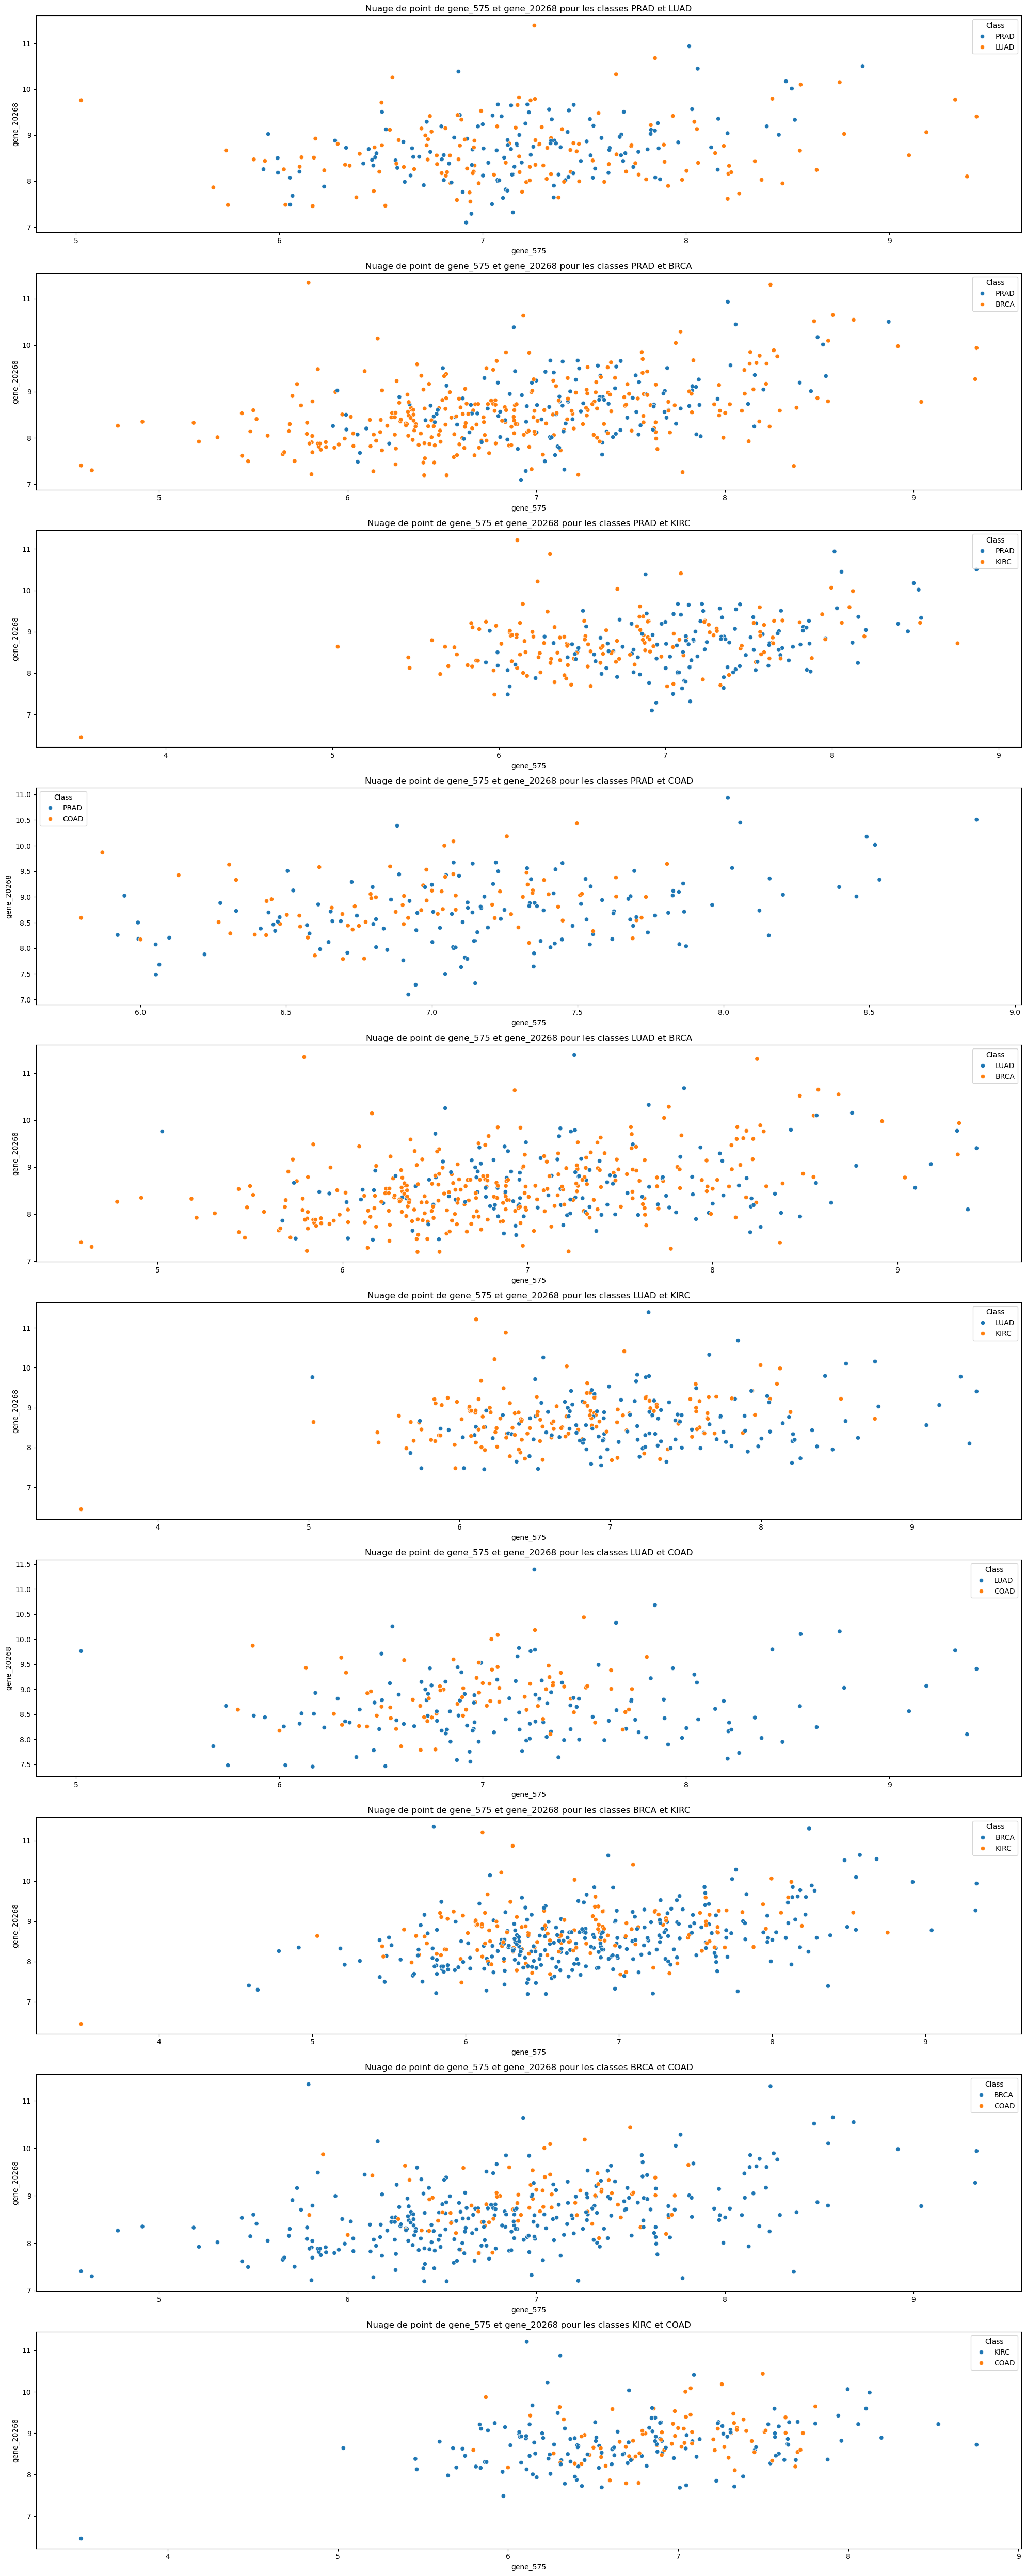

In [26]:
#Nuage de points
fig, axs = plt.subplots(10, 1, figsize=(20, 50))
axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx!=10:
        data = df_select[(df_select['Class'] == i) | (df_select['Class'] == j)]
        sns.scatterplot(data=data, x="gene_575", y="gene_20268", hue="Class", ax=axs[indx])
        axs[indx].set_title(f"Nuage de point de gene_575 et gene_20268 pour les classes {i} et {j}")
        indx+=1
    else:
        break
    
plt.tight_layout()
plt.show()


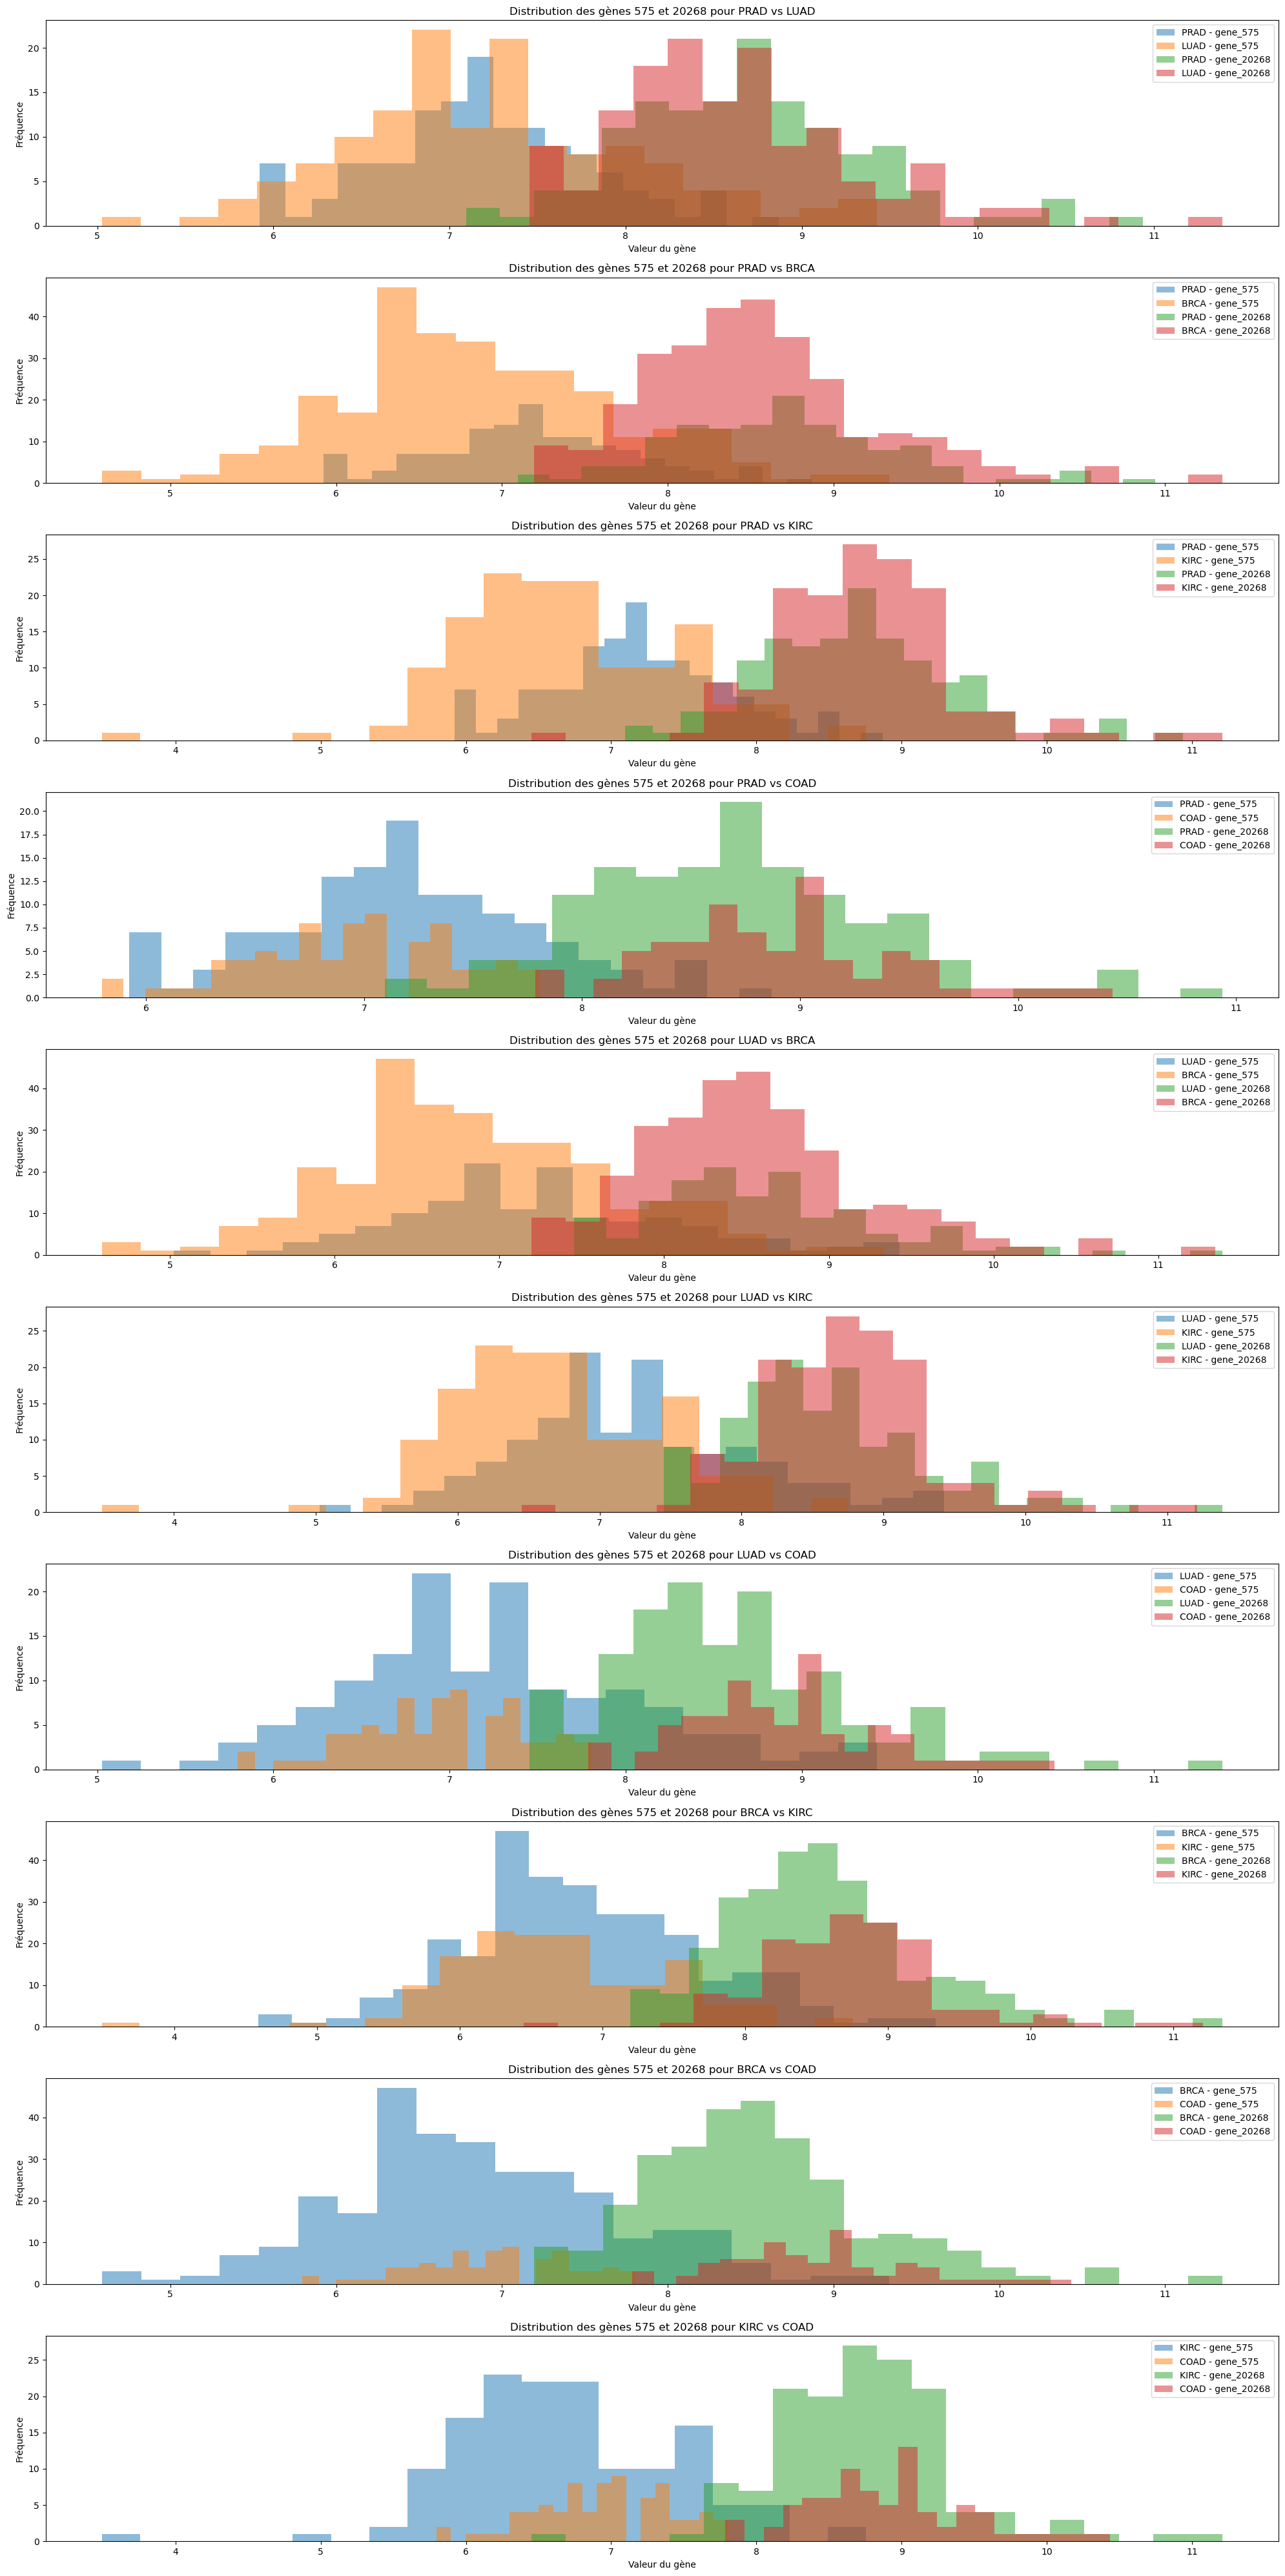

In [27]:
#Histogramme
fig,axs = plt.subplots(10, 1, figsize=(20, 40)) 

axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx<10:
        data = df_select[(df_select['Class'] == i) | (df_select['Class'] == j)]
        
        # Histogramme pour gene_4
        axs[indx].hist(data[data['Class'] == i]['gene_575'], bins=20, alpha=0.5, label=f"{i} - gene_575")
        axs[indx].hist(data[data['Class'] == j]['gene_575'], bins=20, alpha=0.5, label=f"{j} - gene_575")
        
        # Histogramme pour gene_20528
        axs[indx].hist(data[data['Class'] == i]['gene_20268'], bins=20, alpha=0.5, label=f"{i} - gene_20268")
        axs[indx].hist(data[data['Class'] == j]['gene_20268'], bins=20, alpha=0.5, label=f"{j} - gene_20268")
        
        axs[indx].set_title(f"Distribution des gènes 575 et 20268 pour {i} vs {j}")
        axs[indx].legend()
        axs[indx].set_xlabel("Valeur du gène")
        axs[indx].set_ylabel("Fréquence")

        indx+=1
    else:
        break
    

plt.tight_layout()
plt.show()

# ACP

In [28]:
n_couleurs={"BRCA":'r',"COAD":'b',"KIRC":'g',"LUAD":'y',"PRAD":'c'}

In [29]:
#ACP
acp = PCA(n_components = 2)
acp_result = acp.fit_transform(df_select.drop(columns = ["Class"]))

acp_df = pd.DataFrame(data = acp_result, columns = ["ACP1","ACP2"])
acp_df["Class"] = df_filtree["Class"]

# Nuage de points de ACP par paire de classe

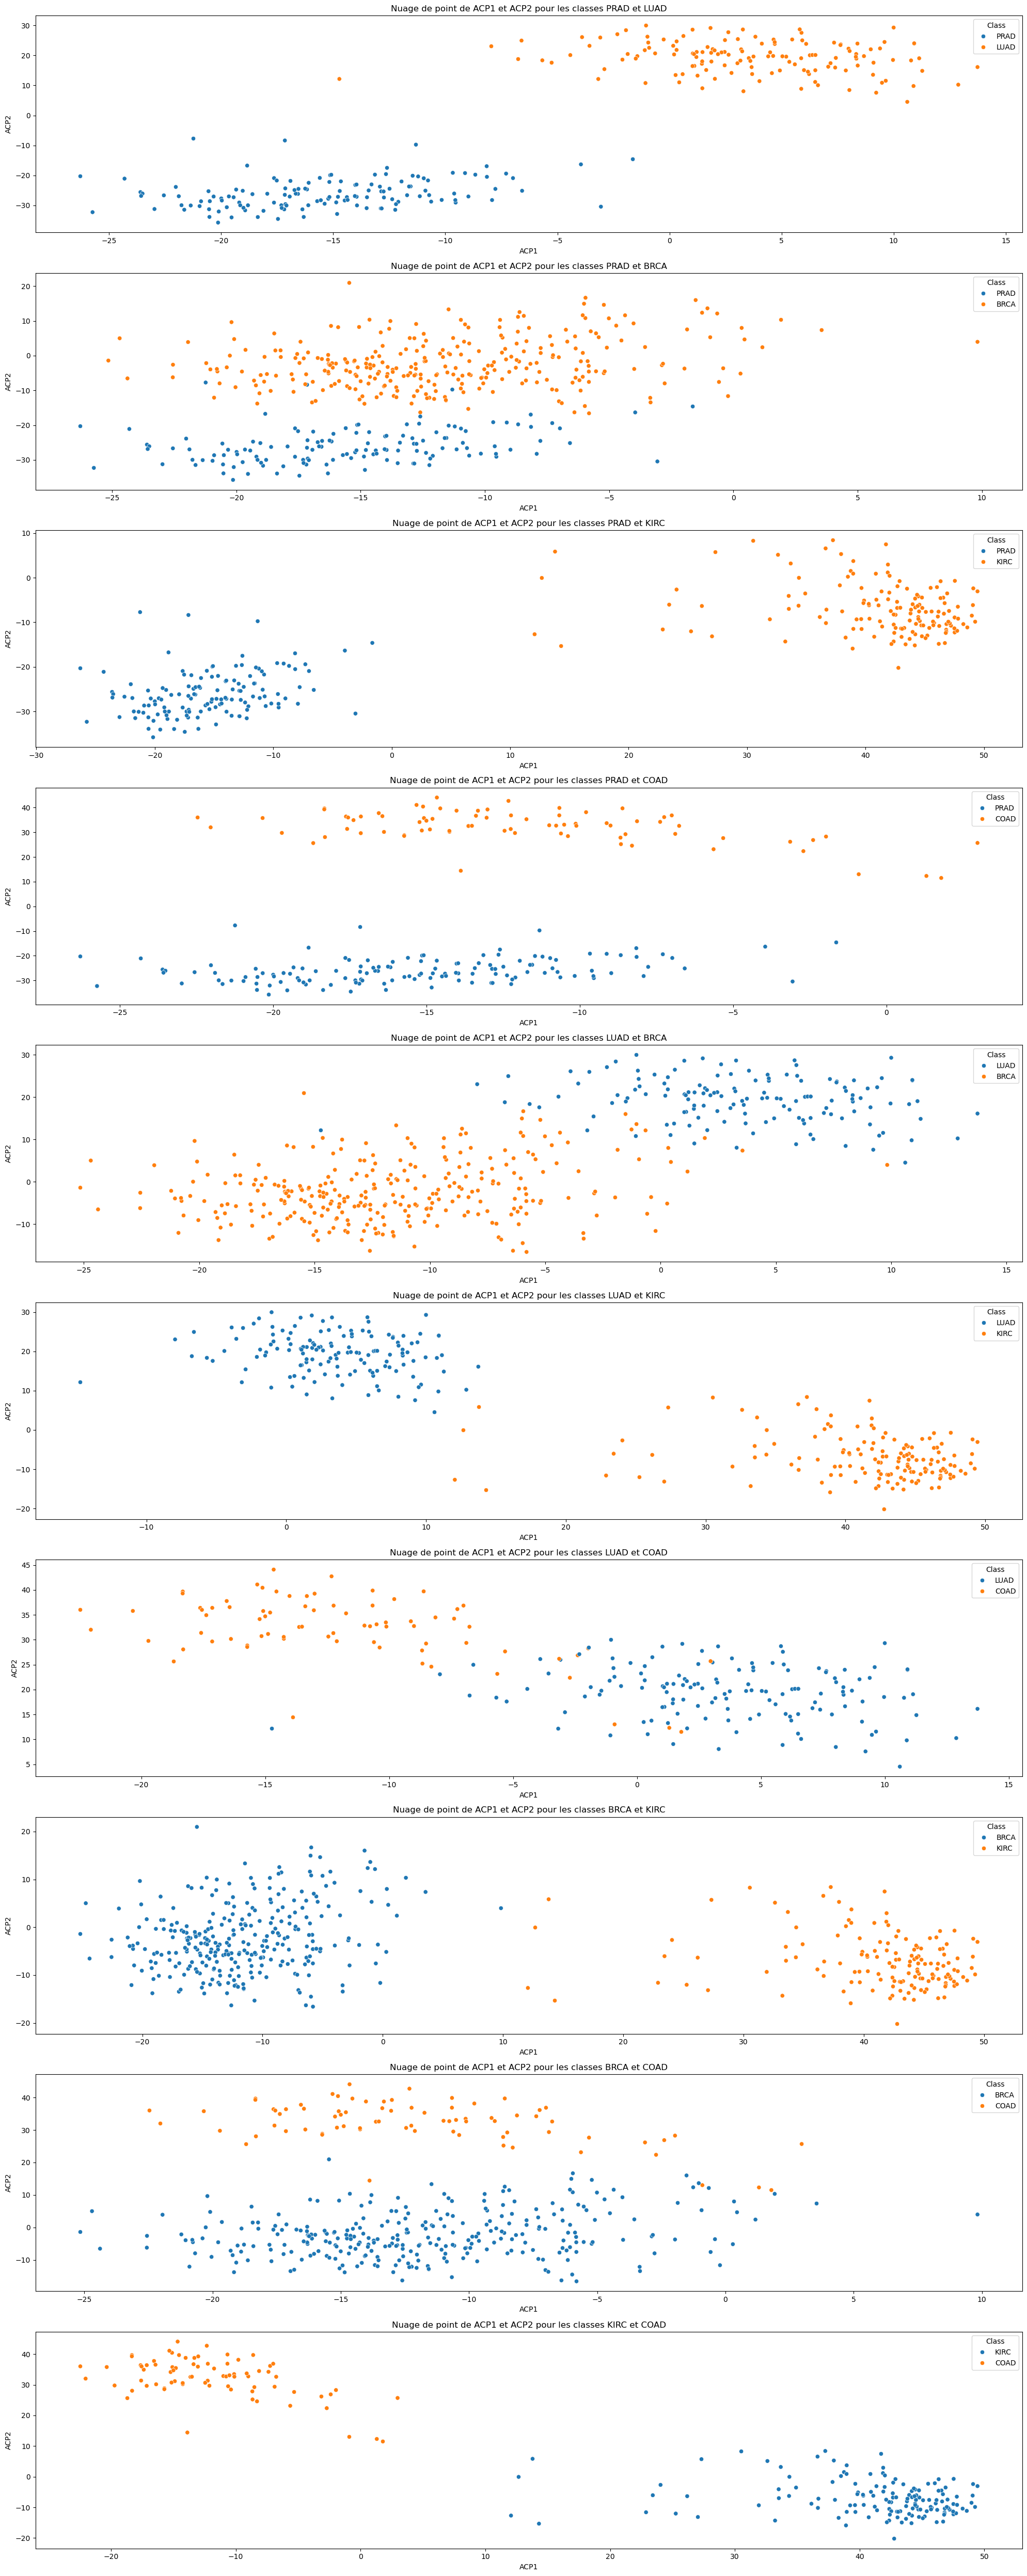

In [30]:
fig, axs = plt.subplots(10, 1, figsize=(20, 50))
axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx!=10:
        data = acp_df[(acp_df['Class'] == i) | (acp_df['Class'] == j)]
        sns.scatterplot(data=data, x=data['ACP1'], y=data['ACP2'], hue="Class", ax=axs[indx])
        axs[indx].set_title(f"Nuage de point de ACP1 et ACP2 pour les classes {i} et {j}")
        indx+=1
    else:
        break
    
plt.tight_layout()
plt.show()

# Nuage de points pour toutes les classes en fonction de l'ACP

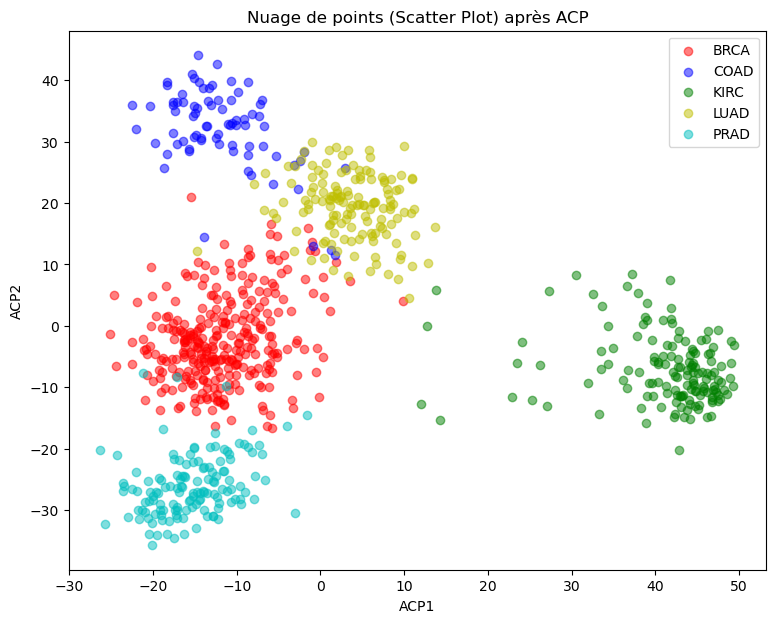

In [34]:
plt.figure(figsize=(9, 7))

for classe, couleur in n_couleurs.items():
    subset = acp_df[acp_df["Class"] == classe]
    plt.scatter(subset["ACP1"], subset["ACP2"], c = couleur, label = classe, alpha = 0.5)

plt.xlabel("ACP1")
plt.ylabel("ACP2")
plt.title("Nuage de points (Scatter Plot) après ACP")

plt.legend()
plt.grid(False)


# Histogramme de ACP par paire de classe

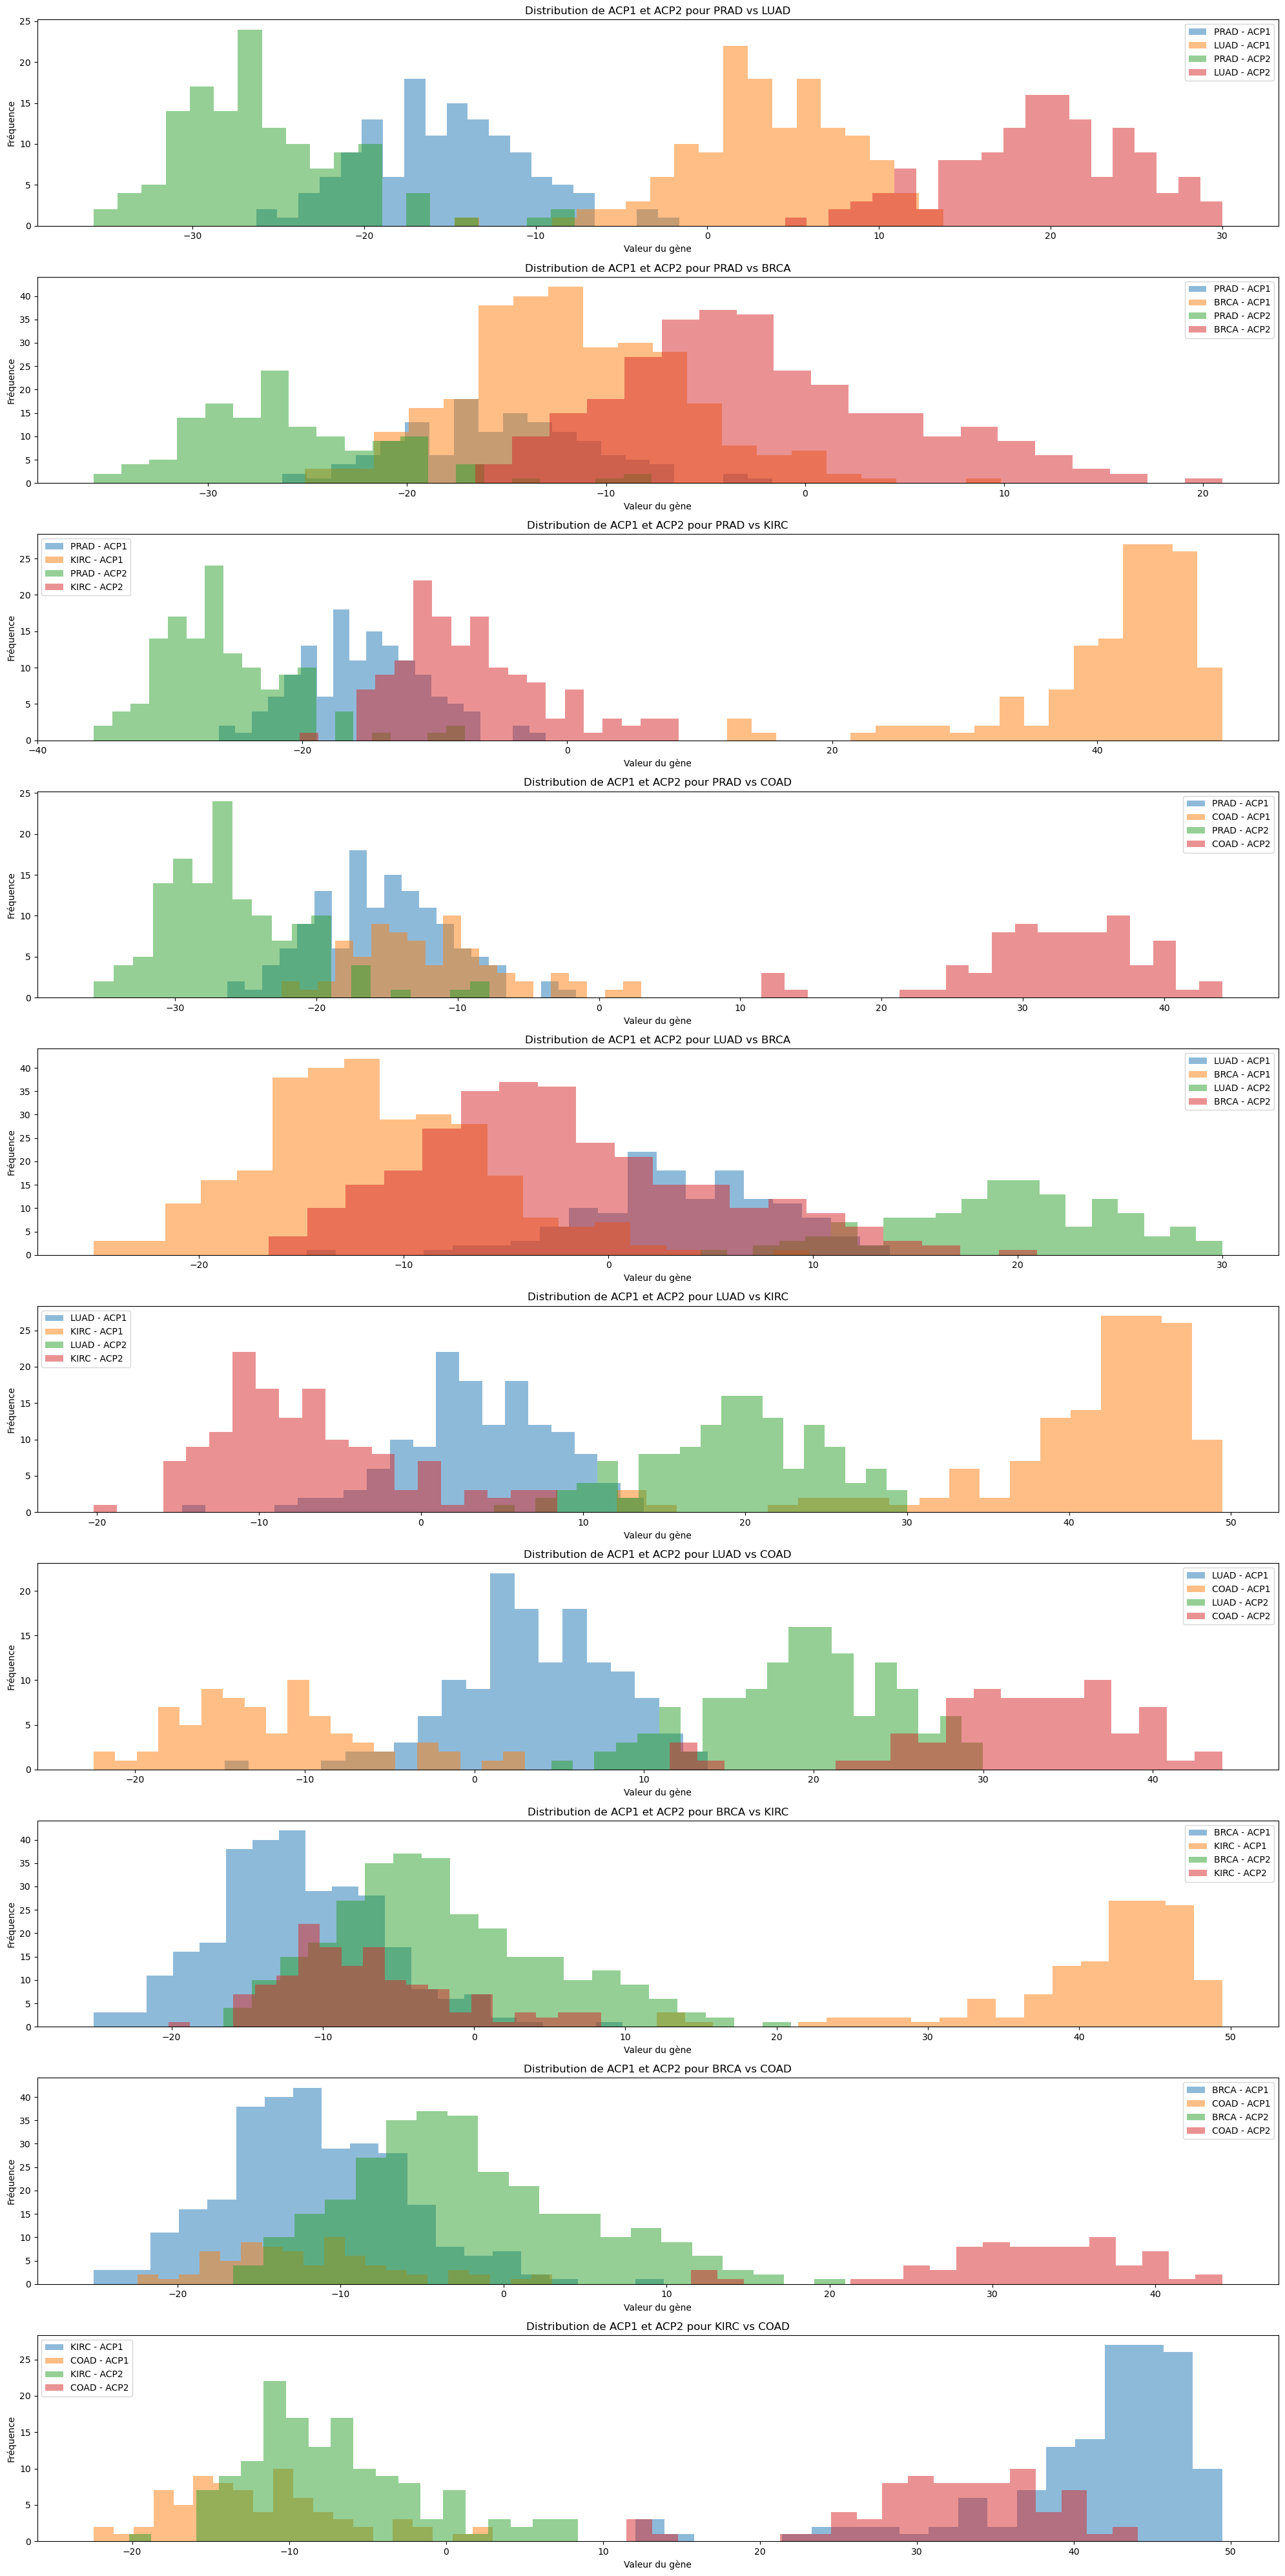

In [36]:
#Histogramme
fig,axs = plt.subplots(10, 1, figsize=(20, 40)) 

axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx<10:
        data = acp_df[(acp_df['Class'] == i) | (acp_df['Class'] == j)]
        
        # Histogramme pour ACP1
        axs[indx].hist(data[data['Class'] == i]['ACP1'], bins=20, alpha=0.5, label=f"{i} - ACP1")
        axs[indx].hist(data[data['Class'] == j]['ACP1'], bins=20, alpha=0.5, label=f"{j} - ACP1")
        
        # Histogramme pour ACP2
        axs[indx].hist(data[data['Class'] == i]['ACP2'], bins=20, alpha=0.5, label=f"{i} - ACP2")
        axs[indx].hist(data[data['Class'] == j]['ACP2'], bins=20, alpha=0.5, label=f"{j} - ACP2")
        
        axs[indx].set_title(f"Distribution de ACP1 et ACP2 pour {i} vs {j}")
        axs[indx].legend()
        axs[indx].set_xlabel("Valeur du gène")
        axs[indx].set_ylabel("Fréquence")

        indx+=1
    else:
        break
    

plt.tight_layout()
plt.show()

# T-SNE

In [37]:
#T-SNE
# La fonction de la technique TSNE ainsi que ses méthodes proviennent de la librairie sklearn.
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_filtree.drop(columns=["Class"]))

tsne_df = pd.DataFrame(data=tsne_result, columns=["TSNE1", "TSNE2"])
tsne_df["Class"] = df_filtree["Class"]

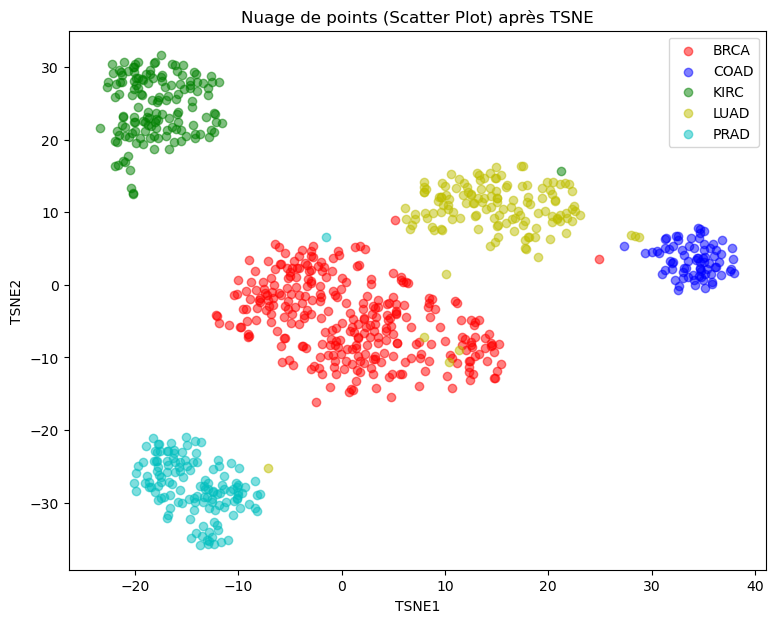

In [38]:
# Affichage d'un nuage de points après transformation TSNE
plt.figure(figsize = (9, 7))

for classe, couleur in n_couleurs.items():
    subset = tsne_df[tsne_df["Class"] == classe]
    plt.scatter(subset["TSNE1"], subset["TSNE2"], c = couleur, label = classe, alpha = 0.5)

plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("Nuage de points (Scatter Plot) après TSNE")

plt.legend()
plt.grid(False)

plt.show()

# Notes

- Je vais merge les deux datasets pour avoir la correspondance de chaque espece a sa classe
- Apres je vais faire un pre-traitement vu qu'il y'a beaucoup de colonnes qui n'ont pas assez d'informations (Beaucoup de 0). La colonne Unamed:0 pourra etre enleve aussi.
- Ensuite je pourrai proceder au calcul de distance
- distance euclidienne la fonction nous permet l'operation par vecteur
- distance cosinus on doit parcourir le df par ligne et faire l'addition
- Lors du calcul de la matrice inv on a utilise pinv() au lieu de lieu de inv() par ce que les matrices ne sont pas carres
- Les classes sont bien separees avec la distance mahalanobis contrairement aux autres
- Pour la visualisation, la bonne paire de classes va correspondre a un ensemble de deux attributs les moins correles possibles